# Autor: Waren Sanchez | 2023-1198

# PARTE 3 DEL PROYECTO:

En esta parte entrenaremos los 10 modelos de regresión solicitados para el proyecto.

In [2]:
# Para manejo y manipulación de datos
import pandas as pd
import numpy as np
import joblib

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Para modelos de Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Para evaluación de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

0.2-) Importación del dataset crudo:

In [3]:
# Rutas:
ruta_fusion = './Datasets_CSV/dataset_fusionado.csv'

# Datasets:
df_fusion = pd.read_csv(ruta_fusion)

In [4]:
df_fusion

,Name,Year,Price,Mileage,Fuel,Transmission
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Manual
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Manual
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Manual
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Manual
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Manual
...,...,...,...,...,...,...
365148,ford Fiesta,2017,10447.0,8337.0,Petrol,Automatic
365149,BMW 3 Series,2014,14995.0,25372.0,Diesel,Manual
365150,ford Fiesta,2017,8950.0,19910.0,Petrol,Manual
365151,vauxhall Astra,2017,10700.0,24468.0,Petrol,Automatic


# Funciones de estandarización y deshacer la estandarización de la columna objetivo.

Estandarizar:

In [6]:
def estandarizar(df):
    # Aquí voy a asumir que df_fusion ya está cargado

    # 2. Estandarizar (Standardization) - Después de la normalización
    scaler_standard = StandardScaler()
    df_standardized = scaler_standard.fit_transform(df[['Price', 'Mileage', 'Year']])

    # Convertimos el resultado a un DataFrame para mantener los nombres de las columnas
    df_standardized = pd.DataFrame(df_standardized, columns=['Price', 'Mileage', 'Year'])

    # Ahora puedes revisar cómo quedaron tus datos estandarizados
    print("Datos Estandarizados:")
    print(df_standardized.head())

    # Si deseas, puedes volver a agregar los datos estandarizados al dataframe original
    df[['Price', 'Mileage', 'Year']] = df_standardized[['Price', 'Mileage', 'Year']]

    # Guardamos los cambios en el archivo CSV


    # Revisa el dataframe fusionado después de la transformación
    print("DataFrame después de la transformación:")
    print(df.head())

# 1. OSL Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Entrenamiento        Prueba
0     MSE   2.190841e-29  2.154468e-29
1    RMSE   4.680642e-15  4.641624e-15
2     MAE   9.013754e-16  9.290807e-16
3      R²   1.000000e+00  1.000000e+00


c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


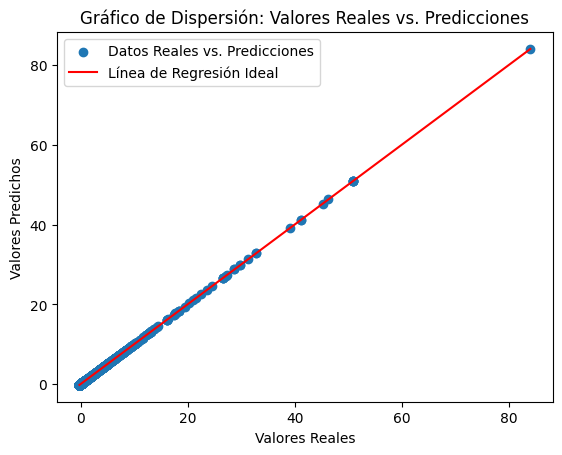

In [7]:
# 1. Cargar los datos desde el archivo CSV y estandarizar
data = pd.read_csv(ruta_fusion)

estandarizar(data)

# 2. Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['float', 'int']).columns

# 3. Separar las características (X) y la variable objetivo (y)
X = data[numeric_cols]
y = data["Price"]  # Suponiendo que "Price" es una columna numérica

# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 7. Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 8. Imprimir las métricas en un formato tabular
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Entrenamiento': [mse_train, rmse_train, mae_train, r2_train],
            'Prueba': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# 9. Graficar los resultados
plt.scatter(y_test, y_test_pred, label='Datos Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Línea de Regresión Ideal')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones")
plt.legend()
plt.show()

# 2. Ridge Regresion

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual


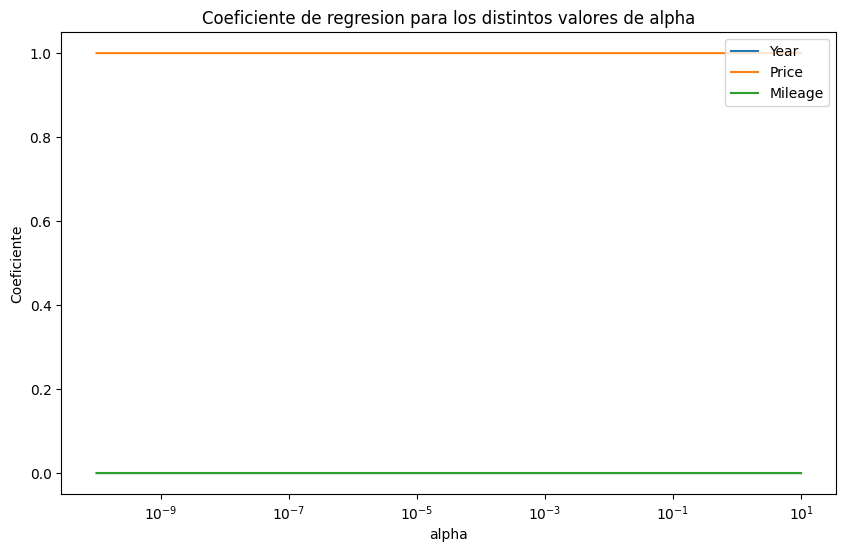

  Métrica      Training          Test
0     MSE  2.190841e-29  2.154468e-29
1    RMSE  4.680642e-15  4.641624e-15
2     MAE  9.013754e-16  9.290807e-16
3      R²  1.000000e+00  1.000000e+00


c:\Users\warre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 


# Carga los datos y estandariza
data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Selecciona solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['float', 'int']).columns

# Separa las características (X) y la variable objetivo (y)
X = data[numeric_cols]
y = data["Price"]

# Divide los datos en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione Ridge per diversi valori di alpha
alphas = np.logspace(-10, 1, 100)
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Convierte los coeficientes en un DataFrame
coefs = np.array(coefs)
df_coefs = pd.DataFrame(coefs, columns=X.columns)

# Gráfico de coeficientes
plt.figure(figsize=(10, 6))
ax = plt.gca()
for y in df_coefs:
    plt.plot(alphas, df_coefs[y], label=y)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coeficiente')
plt.title('Coeficiente de regresion para los distintos valores de alpha')
plt.legend(loc='upper right')
plt.axis('tight')
plt.show()

# Selecciona el mejor valor de alpha usando GridSearchCV
param_grid = {'alpha': alphas}
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train, y_train)
best_alpha = grid.best_params_['alpha']

# Addestra il modello finale con il miglior alpha
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

# Fai le predizioni
y_pred = model.predict(X_test)

# Calcula las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Crea un DataFrame para la matricula
metriche = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metriche = pd.DataFrame(metriche)
print(df_metriche)

# 3.  Bayesian Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica      Training          Test
0     MSE  1.061237e+06  1.039297e+06
1    RMSE  1.030164e+03  1.019459e+03
2     MAE  1.941793e+02  2.006762e+02
3      R² -1.056849e+06 -1.056879e+06


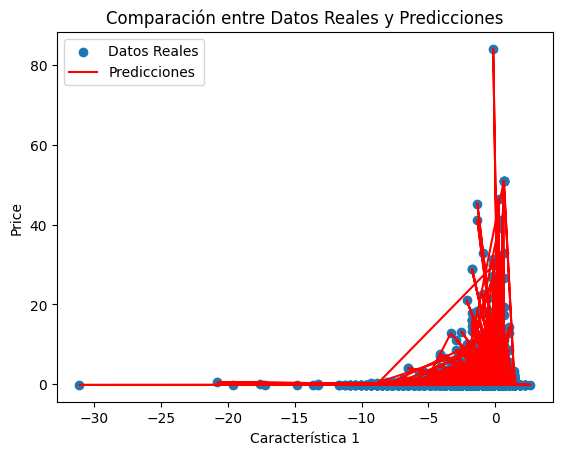

In [9]:
import scipy.stats as stats

data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols]
y = data["Price"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo (regresión lineal bayesiana)
def model(X, w, b, sigma):
    return np.dot(X, w) + b

# Distribuciones a priori
mu_0 = np.zeros(X_train.shape[1])  # Media de la distribución a priori para los pesos
Sigma_0 = np.eye(X_train.shape[1])  # Covarianza de la distribución a priori para los pesos
sigma_y = 1.0  # Desviación estándar del ruido

# Inferencia (optimización de la verosimilitud)
def log_likelihood(w, b, sigma, X, y):
    y_pred = model(X, w, b, sigma)
    return np.sum(stats.norm.logpdf(y, loc=y_pred, scale=sigma))

# Optimizar la verosimilitud
from scipy.optimize import minimize
result = minimize(lambda params: -log_likelihood(params[:X_train.shape[1]], params[-2], params[-1], X_train, y_train), x0=np.concatenate([mu_0, np.array([0, sigma_y])]))

# Obtener los parámetros óptimos
w_map, b_map, sigma_map = result.x[:X_train.shape[1]], result.x[-2], result.x[-1]

# Hacer predicciones en entrenamiento y test
y_train_pred = model(X_train, w_map, b_map, sigma_map)
y_test_pred = model(X_test, w_map, b_map, sigma_map)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Visualización (ejemplo)
# Asumiendo que la primera característica numérica es la que queremos visualizar
plt.scatter(X_test.iloc[:, 0], y_test, label='Datos Reales')
plt.plot(X_test.iloc[:, 0], y_pred, color='red', label='Predicciones')
plt.xlabel('Característica 1')
plt.ylabel('Price')
plt.title('Comparación entre Datos Reales y Predicciones')
plt.legend()
plt.show()

# 4. Lasso Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Training      Test
0     MSE  0.009959  0.009753
1    RMSE  0.099793  0.098757
2     MAE  0.018726  0.019356
3      R²  0.990083  0.990082


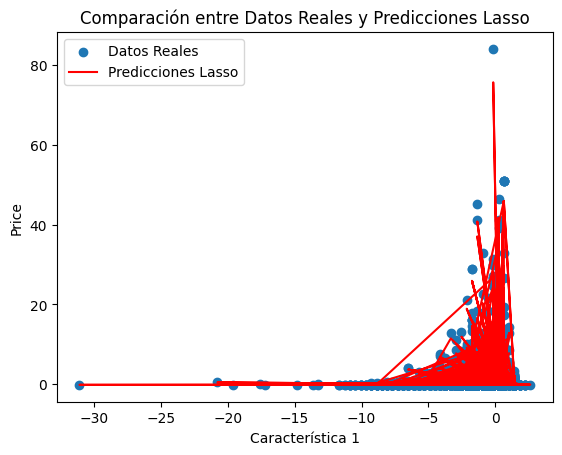

In [10]:
# Cargar los datos
data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols]
y = data["Price"]  # Asegúrate que "Price" es una columna numérica

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Lasso (ajusta el valor de alpha según tus necesidades)
lasso = Lasso(alpha=0.1)

# Entrenar el modelo
lasso.fit(X_train, y_train)

# Hacer predicciones en entrenamiento y test
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Visualización (ejemplo)
# Asumiendo que la primera característica numérica es la que queremos visualizar
plt.scatter(X_test.iloc[:, 0], y_test, label='Datos Reales')
plt.plot(X_test.iloc[:, 0], y_test_pred, color='red', label='Predicciones Lasso')
plt.xlabel('Característica 1')
plt.ylabel('Price')
plt.title('Comparación entre Datos Reales y Predicciones Lasso')
plt.legend()
plt.show()

# 5. Nearest Neighbors Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Training      Test
0     MSE  0.089625  0.002653
1    RMSE  0.299375  0.051505
2     MAE  0.001146  0.000856
3      R²  0.910745  0.997302


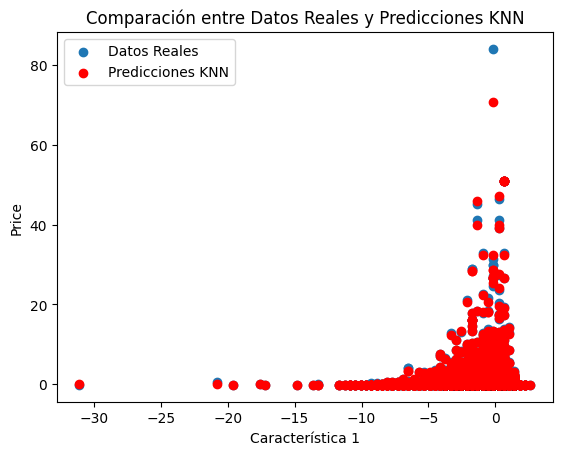

In [11]:
# Cargar los datos   

data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols]
y = data["Price"]  # Asegúrate que "Price" es una columna numérica

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN (ajusta el valor de n_neighbors según tus necesidades)
knn = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en entrenamiento y test
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Visualización (ejemplo)
# Asumiendo que la primera característica numérica es la que queremos visualizar
plt.scatter(X_test.iloc[:, 0], y_test, label='Datos Reales')
plt.scatter(X_test.iloc[:, 0], y_test_pred, color='red', label='Predicciones KNN')
plt.xlabel('Característica 1')
plt.ylabel('Price')
plt.title('Comparación entre Datos Reales y Predicciones KNN')
plt.legend()
plt.show()

# 6. Decision Tree Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Training      Test
0     MSE  0.008128  0.014768
1    RMSE  0.090156  0.121522
2     MAE  0.024271  0.025046
3      R²  0.991905  0.984982


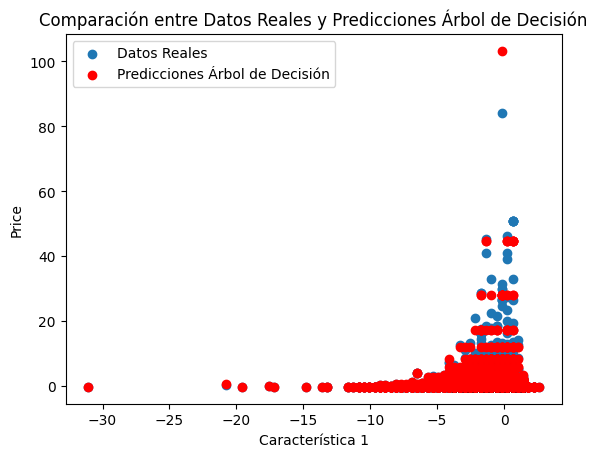

In [12]:
# Cargar los datos   

data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols]
y = data["Price"]  # Asegúrate que "Price" es una columna numérica

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión (ajusta la profundidad máxima según tus necesidades)
tree = DecisionTreeRegressor(max_depth=5)

# Entrenar el modelo
tree.fit(X_train, y_train)

# Hacer predicciones en entrenamiento y test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Visualización (ejemplo)
# Asumiendo que la primera característica numérica es la que queremos visualizar
plt.scatter(X_test.iloc[:, 0], y_test, label='Datos Reales')
plt.scatter(X_test.iloc[:, 0], y_test_pred, color='red', label='Predicciones Árbol de Decisión')
plt.xlabel('Característica 1')
plt.ylabel('Price')
plt.title('Comparación entre Datos Reales y Predicciones Árbol de Decisión')
plt.legend()
plt.show()

# 7. Random Forest Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Training      Test
0     MSE  0.012975  0.000201
1    RMSE  0.113906  0.014182
2     MAE  0.000345  0.000190
3      R²  0.987079  0.999795


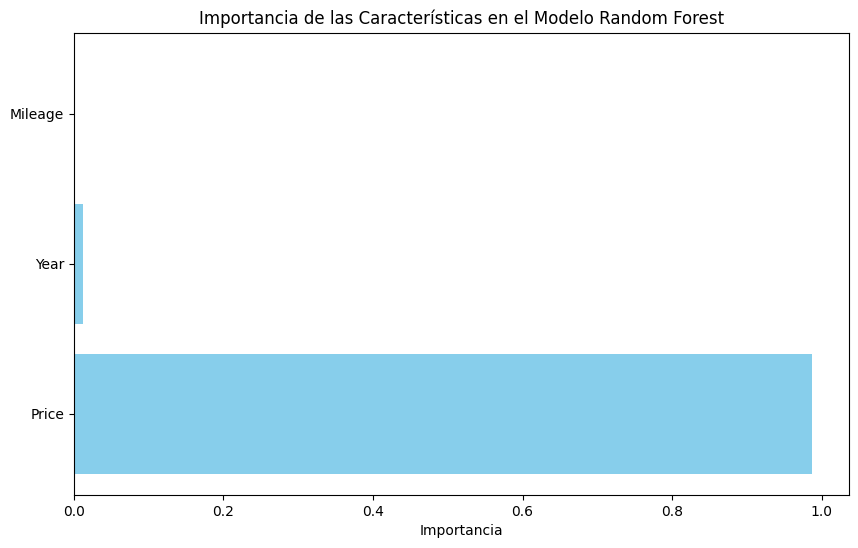

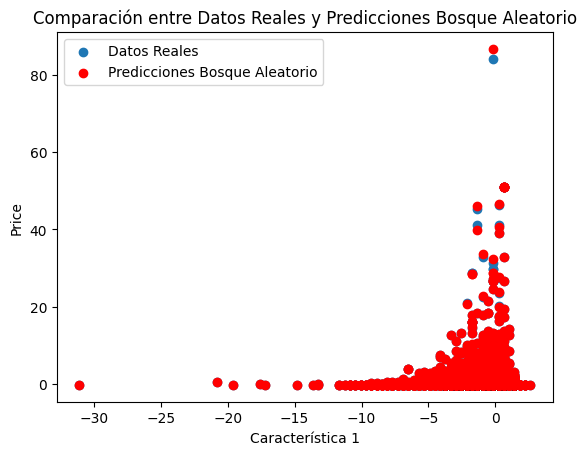

In [21]:
# Cargar los datos   

data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols]
y = data["Price"]  # Asegúrate que "Price" es una columna numérica

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de bosque aleatorio (ajusta los hiperparámetros según tus necesidades)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones en entrenamiento y test
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Calcular la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para la importancia de las características
importance_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': feature_importances
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.show()

# Visualización (ejemplo)
# Asumiendo que la primera característica numérica es la que queremos visualizar
plt.scatter(X_test.iloc[:, 0], y_test, label='Datos Reales')
plt.scatter(X_test.iloc[:, 0], y_test_pred, color='red', label='Predicciones Bosque Aleatorio')
plt.xlabel('Característica 1')
plt.ylabel('Price')
plt.title('Comparación entre Datos Reales y Predicciones Bosque Aleatorio')
plt.legend()
plt.show()

# 8. SVM (Support Vector Machine) Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Training      Test
0     MSE  0.009968  0.009967
1    RMSE  0.099838  0.099834
2     MAE  0.099836  0.099831
3      R²  0.990073  0.989865


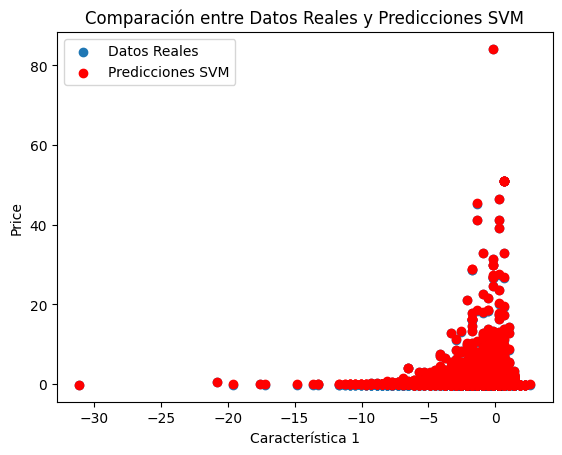

In [14]:
# Cargar los datos
data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols]
y = data["Price"]  # Asegúrate que "Price" es una columna numérica

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVM (ajusta el kernel y otros hiperparámetros según tus necesidades)
svr = SVR(kernel='linear')  # Puedes cambiar el kernel a 'rbf', 'poly', etc.

# Entrenar el modelo
svr.fit(X_train, y_train)

# Hacer predicciones en entrenamiento y test
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Visualización (ejemplo)
# Asumiendo que la primera característica numérica es la que queremos visualizar
plt.scatter(X_test.iloc[:, 0], y_test, label='Datos Reales')
plt.scatter(X_test.iloc[:, 0], y_test_pred, color='red', label='Predicciones SVM')
plt.xlabel('Característica 1')
plt.ylabel('Price')
plt.title('Comparación entre Datos Reales y Predicciones SVM')
plt.legend()
plt.show()

# 9. Neural Network MLP Regression

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Training      Test
0     MSE  0.000012  0.000025
1    RMSE  0.003501  0.005045
2     MAE  0.000906  0.000931
3      R²  0.999988  0.999974


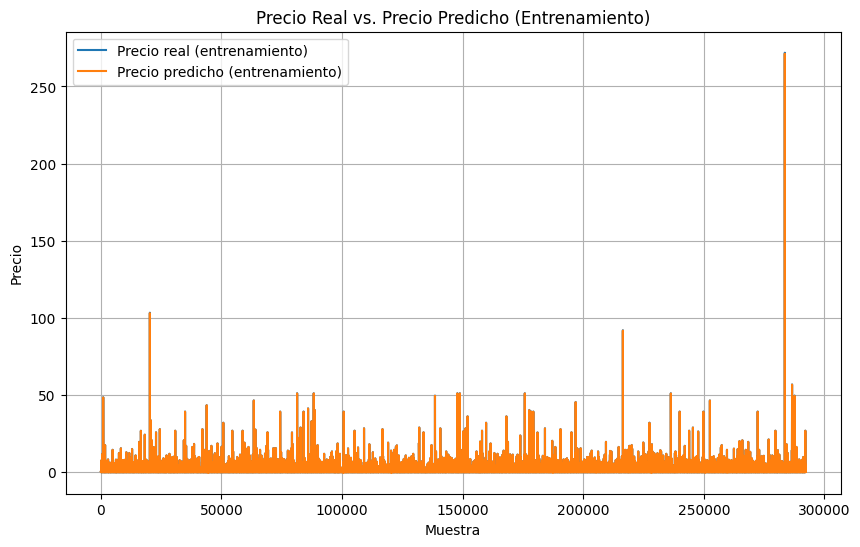

In [15]:
# Cargar los datos
data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols].values
y = data["Price"].values  # Suponiendo que "Price" es la columna objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo   

model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Definimos el tamaño de la gráfica
plt.plot(y_train, label='Precio real (entrenamiento)')
plt.plot(y_train_pred, label='Precio predicho (entrenamiento)')
plt.title('Precio Real vs. Precio Predicho (Entrenamiento)')
plt.xlabel('Muestra')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# 10. Ada Boost Regressor

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual
  Métrica  Training      Test
0     MSE  0.070032  0.072581
1    RMSE  0.264635  0.269409
2     MAE  0.218167  0.218472
3      R²  0.930258  0.926191


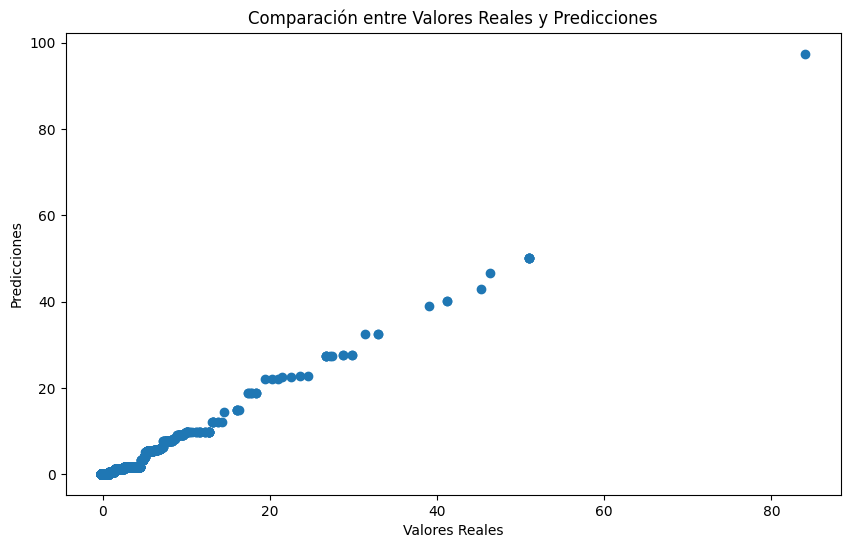

In [16]:
# Cargar los datos
data = pd.read_csv(ruta_fusion)

estandarizar(data)

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
X = data[numeric_cols].values
y = data["Price"].values  # Suponiendo que "Price" es la columna objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo AdaBoost
base_estimator = DecisionTreeRegressor(max_depth=3)  # Puedes ajustar la profundidad del árbol
model = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Crear un DataFrame para las métricas
metricas = {'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
            'Training': [mse_train, rmse_train, mae_train, r2_train],
            'Test': [mse_test, rmse_test, mae_test, r2_test]}
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()

# Usando el modelo de regresion Random Forest:

In [32]:
# Cargar el archivo CSV con nuevos datos
ruta_nuevos_datos = "./Datasets_CSV/dataset_fusionadoPrueba.csv"  # Cambia por la ruta del archivo
nuevos_datos = pd.read_csv(ruta_nuevos_datos)

# Función para estandarizar (reutilizamos la misma lógica)
estandarizar(nuevos_datos)

# Asegúrate de que las columnas del nuevo dataset coincidan con las del modelo entrenado
X_nuevos_datos = nuevos_datos.select_dtypes(include=['int', 'float'])  # Seleccionar columnas numéricas

# Realizar predicciones con el modelo entrenado
nuevas_predicciones = rf.predict(X_nuevos_datos)

# Agregar las predicciones como una nueva columna al DataFrame
nuevos_datos['Predicted_Price'] = nuevas_predicciones

# Guardar el archivo con las predicciones
nuevos_datos.to_csv(ruta_nuevos_datos, index=False)

# Mostrar los datos con las predicciones
print("Datos con predicciones:")
print(nuevos_datos.head())

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Fuel
- Transmission
